In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

%matplotlib inline

# Hide Warnings
pd.options.mode.chained_assignment = None

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# EuroSAT: Land Use and Land Cover Classification with Sentinel-2 

https://www.tensorflow.org/datasets/catalog/eurosat#eurosatall

Advice on Semester Projects

- argue why clustering is a good idea 
- why dimensionality reduction / PCA is a good idea
- keep EDA very short

Presentation

- Problem Setting
	- Definition
	- Appropiate Learning Problem
	- Define Target/Input Attributes
- Analysis / EDA
- Method
	- Suitable Approach (at least two)
	- Baseline Method
- Experiments
	- Hyperparameter Tuning
	- Evaluation (Comparison of Models)
- Conclusions
	- Result Interpretation

In [55]:
ds, info = tfds.load('eurosat', split='all', shuffle_files=True, data_dir='./data/eurosat', with_info=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)

<PrefetchDataset element_spec={'filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(64, 64, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [56]:
ds_numpy = tfds.as_numpy(ds)
print(ds_numpy)

### EDA

In [73]:
info.features
# Image has three channels (R G B)

FeaturesDict({
    'filename': Text(shape=(), dtype=string),
    'image': Image(shape=(64, 64, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})

In [130]:
# Labels
print("Number of Labels:", info.features["label"].num_classes)
print("Label Names:", info.features["label"].names)
# print(info.features["label"].int2str(7))  # Human readable version (8 -> 'cat')
# print(info.features["label"].str2int('AnnualCrop'))

Number of Labels: 10
Label Names: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [90]:
print("Number of Elements:", info.splits['train'].num_examples)

Number of Elements: 27000


,filename,image,label
0,Forest_687.jpg,,1 (Forest)
1,Residential_188.jpg,,7 (Residential)
2,HerbaceousVegetation_1056.jpg,,2 (HerbaceousVegetation)
3,Residential_1762.jpg,,7 (Residential)

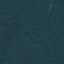
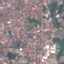
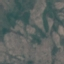
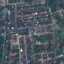

In [102]:
tfds.as_dataframe(ds.take(4), info)

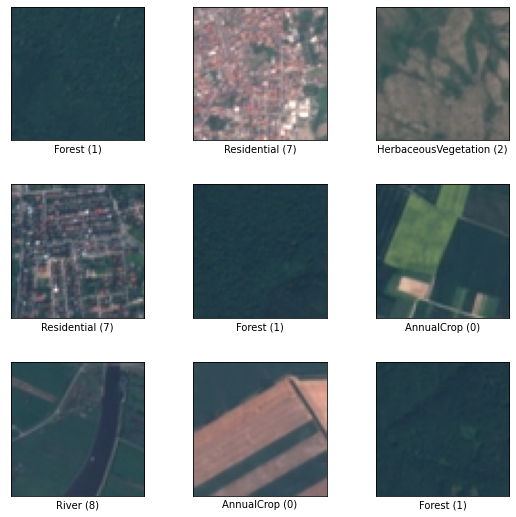

In [101]:
# Examples
fig = tfds.show_examples(ds, info)

In [108]:
ds_list = list(ds)

In [136]:
print("Label", "Count")
for x in range(0,10):
    filtered = filter(lambda image: image['label'].numpy() == x, ds_list)
    print(info.features["label"].int2str(x), len(list(filtered)))

Label Count
AnnualCrop 3000
Forest 3000
HerbaceousVegetation 3000
Highway 2500
Industrial 2500
Pasture 2000
PermanentCrop 2500
Residential 3000
River 2500
SeaLake 3000
